# Лабораторная работа № 2
## Линейная нейронная сеть. Правило обучения Уидроу-Хоффа

#### Выполнил: Цапков А.М.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import *

In [5]:
# Реализация 
def _activation(x):
    # return 1 / ( 1 + exp(-x))
    return x
class RosenblatPerceptron(object):
    def __init__(self,  learningRate = 0.001):
        self.learningRate = learningRate
    
    def fit(self, X_i, Y_i):
        X, Y = X_i.copy(), Y_i.copy()
        self._w = np.random.rand(Y.shape[1] ,X.shape[1] + 1)
        
        # index = [i for i in range(Y.shape[0])]
        # random.shuffle(index)
        # for i in range(len(index)):
        #     X[i] = X[index[i]]
        #     Y[i] = Y[index[i]] 

        for _ in range(600):
            for x, y in zip(X, Y):
                pred = self.predict_one(x)
                for pred_one, y_one, neuron_waights in zip(pred, y, self._w):
                    dw = (y_one - pred_one) * self.learningRate
                    neuron_waights += np.append(x, [1]) * dw


    def predict_one(self, x):
        inp = np.append(x, [1])
        out = np.dot(self._w, inp)
        for i in range(out.shape[0]):
            out[i] = _activation(out[i])
        return out

    def predict(self, X):
        ans = []
        for x in X:
            ans.append(self.predict_one(x))
        return np.array(ans)

    def predictPlot(self, X, N):
        out = []
        inp = X.tolist()
        for i in range(N):
            out.append(self.predict_one(np.array(inp))[0])
            inp = inp[1:]
            inp.append(out[-1])
        return out
            
    
    def y(self, x, neuron = 0):
        return (-x*self._w[neuron][0] - self._w[neuron][2]) / self._w[neuron][1]

    def score(self, X, Y):
        Y_pred = self.predict(X)
        k, i = 0, 0
        for y, y_pred in zip(Y, Y_pred):
            for r, r1 in zip(y, y_pred):
                if r != r1:
                    i += 1
                    break
            k += 1
        return float(k - i) / k

def origin1(t):
    return cos(-2*t*t + 7*t)

In [6]:

fTable = []
grid = []
for x in np.arange(0, 5, 0.025):
    grid.append(x)
    fTable.append(origin1(x))

inpSize = 3
X = []
Y = []
for i in range(len(fTable) - inpSize):
    inp = [fTable[k] for k in range(i, i+inpSize)]
    X.append(inp)
    Y.append([fTable[i+inpSize]])
X = np.array(X)
Y = np.array(Y)

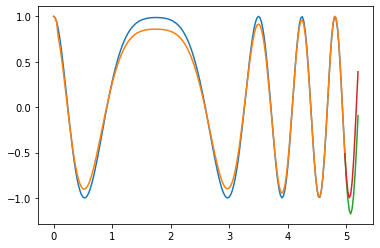

In [7]:
model = RosenblatPerceptron(0.1)
model.fit(X, Y)


pred_size = 10
Y_predPlot = model.predictPlot(X[200 - inpSize - 1], pred_size)

Y_pred = model.predict(X)
Y_pred = [[x]for x in X[0]] + Y_pred.tolist()


plt.plot(grid, fTable)
plt.plot(grid, Y_pred)
plt.plot([x - 0.025 for x in np.arange(5, 5 + pred_size * 0.025, 0.025)], Y_predPlot)
plt.plot([x - 0.025 for x in np.arange(5, 5 + pred_size * 0.025, 0.025)], 
         [origin1(x - 0.025) for x in np.arange(5, 5 + pred_size * 0.025, 0.025)])
plt.show()

In [8]:
def origin2(t):
    return sin(sin(t)*t*t + 3*t - 10)
def target(t):
    return 0.25 * sin(sin(t)*t*t + 3*t - 3)

fTable = []
fTableTar = []
grid = []
for x in np.arange(2.5, 5, 0.01):
    grid.append(x)
    fTable.append(origin2(x))
    fTableTar.append(target(x))

inpSize = 3
X = []
Y = []
for i in range(len(fTable) - inpSize):
    inp = [fTable[k] for k in range(i, i+inpSize)]
    X.append(inp)
    Y.append([fTableTar[i+inpSize - 1]])
X = np.array(X)
Y = np.array(Y)

model = RosenblatPerceptron(0.01)
model.fit(X, Y)

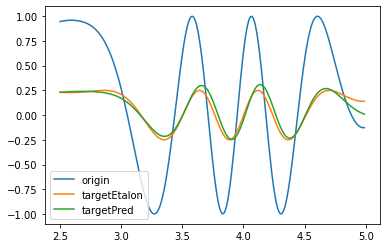

In [10]:
Y_pred = model.predict(X)
Y_pred = fTableTar[0:inpSize] + [y[0]for y in Y_pred.tolist()]


plt.plot(grid, fTable, label="origin")
plt.plot(grid, fTableTar, label="targetEtalon")
plt.plot(grid, Y_pred, label="targetPred")
# plt.plot([x - 0.025 for x in np.arange(5, 5 + pred_size * 0.025, 0.025)], Y_predPlot)
# plt.plot([x - 0.025 for x in np.arange(5, 5 + pred_size * 0.025, 0.025)], 
#          [origin1(x - 0.025) for x in np.arange(5, 5 + pred_size * 0.025, 0.025)])
plt.legend()
plt.show()

# Выводы
В данной лабораторной работе используется архитектура персептрона, которая уже больше знакома современным студентам и интересующимся нейросетями. Она способна на куда большее чем персептрон Розенблата в его оригинальной форме. Очень интересно делать эти лабораторные работы и как будто от первого лица следить за всей историей развития нейросетей.